In [1]:
from __future__ import division
import numpy as np
from scipy.integrate import quad
from scipy.optimize import root
from scipy.interpolate import barycentric_interpolate as bi
import matplotlib.pyplot as plt
%matplotlib inline

### Problem 1

In [2]:
alpha = lambda c : 1/np.sqrt(1 - c**2)
c = lambda x : -.7*(x**2 - 1)

def L(x, y, dy):
    return alpha(c(x))*np.sqrt(1 + (alpha(c(x))*dy(x))**2) - (alpha(c(x))**2*c(x)*dy(x))

### Problem 2

In [3]:
y = lambda x : 2.5*x + 2.5
dy = lambda x : 2.5*np.ones_like(x)

value, error = quad(L, -1, 1, args=(y, dy))
print value

3.87708204914


The integral, 
$$\int_{-1}^{1} \text{sec }\theta (x) dx$$ 
is minimized when $\theta(x) = 0, \forall x$.

Therefore, 
$$\text{min}_x \int_{-1}^{1} \text{sec }\theta (x) dx = \int_{-1}^{1} dx = 2$$

### Problem 3

In [4]:
# cheb function from the Psuedospectral 1 lab
def cheb(N):
    x =  np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)

    dX = X - X.T

    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D  = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    return D, x

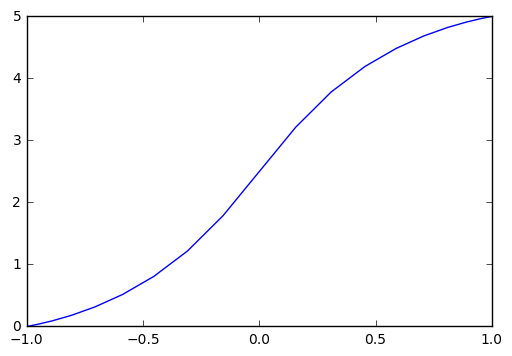

In [5]:
c = lambda x: (-7/10)*(x**2-1)

def alpha_(x):
    return (1-c(x)**2)**(-.5)

def cheb(N):
    x =  np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)

    dX = X - X.T

    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D  = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    return D, x

N = 20
D,x = cheb(N)

def F(y):
    Ly = D.dot(alpha_(x)**3 * D.dot(y) * (1+(alpha_(x)*D.dot(y))**2)**(-.5) - alpha_(x)**2*c(x))
    Ly[0] = y[0]-5
    Ly[-1] = y[-1]-0
    return Ly
               

guess = (5/2)*(x+1)
solution = root(F, guess).x
oldy = solution.copy()
y = bi(x, solution, np.linspace(-1,1,100))

plt.plot(x,solution)
plt.show()

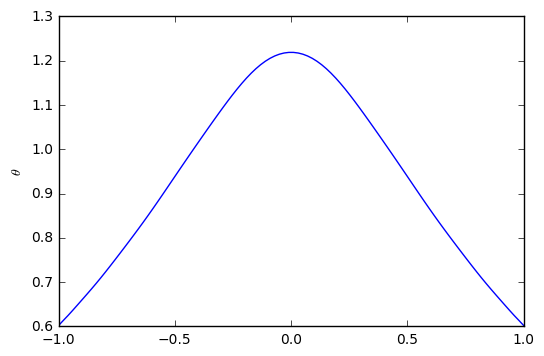

In [8]:
yp = D.dot(oldy)

def F(theta):
    return yp - (np.sin(theta)+ c(x))/np.cos(theta)

guess = np.ones((len(x)))
solution = root(F, guess).x
y = bi(x, solution, np.linspace(-1,1,100))

plt.plot(np.linspace(-1,1,100),y)
plt.ylabel(r"$\theta$")
plt.show()